<a href="https://colab.research.google.com/github/juyounLee/Tensorflow2.0/blob/main/4_1_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

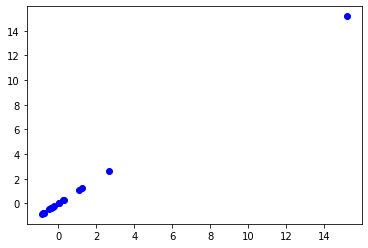

In [3]:
# show the graph

plt.plot(population_inc, population_inc, 'bo')

In [4]:
X = population_inc[0:5] + population_inc[6:]
Y = population_old[0:5] + population_old[6:]

Text(0, 0.5, 'Elderly Population Rate')

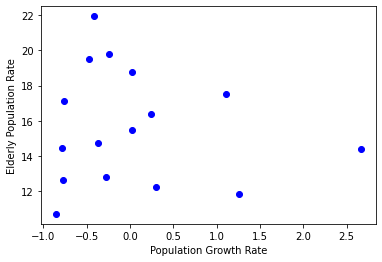

In [5]:
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')

In [6]:
# Get the averages of x and y
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

In [7]:
# get a and b with Least Square Method
a = sum([(y-y_bar)*(x-x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x-x_bar)**2 for x in X])

b = y_bar - a * x_bar
print('a: {} b: {}'.format(a, b))

a: -0.355834147915461 b: 15.669317743971302


In [8]:
# get the data of x and y for drawing graph

import numpy as np

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

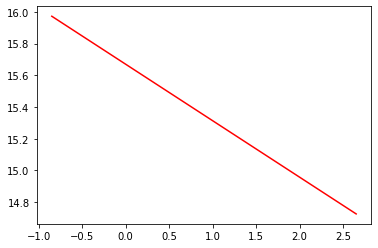

In [9]:
# draw the plot
plt.plot(line_x, line_y, 'r-')

### TensorFlow 사용

In [10]:
import random

In [11]:
# initialize 'a' and 'b'

a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [12]:
# define the fuction for the average of the square of residual

def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y-y_pred)**2)
  return loss

In [13]:
optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  # minimize the average of the square of residual
  optimizer.minimize(compute_loss, var_list = [a, b])

  if i%100 == 99:
    print(i, 'a: {} b: {} loss: {}'.format(a.numpy(), b.numpy(), compute_loss().numpy()))

99 a: 0.11212540417909622 b: 6.848831653594971 loss: 87.40130615234375
199 a: -0.12441810220479965 b: 11.30926513671875 loss: 28.746767044067383
299 a: -0.26089105010032654 b: 13.880478858947754 loss: 12.973325729370117
399 a: -0.32395973801612854 b: 15.068771362304688 loss: 10.140623092651367
499 a: -0.34712138772010803 b: 15.505162239074707 loss: 9.807687759399414
599 a: -0.3539040982723236 b: 15.63294792175293 loss: 9.782123565673828
699 a: -0.35549047589302063 b: 15.662839889526367 loss: 9.780845642089844
799 a: -0.35578539967536926 b: 15.668401718139648 loss: 9.780803680419922
899 a: -0.355829119682312 b: 15.669218063354492 loss: 9.780803680419922
999 a: -0.35583382844924927 b: 15.669301986694336 loss: 9.780802726745605


Text(0, 0.5, 'Elderly Population Rate')

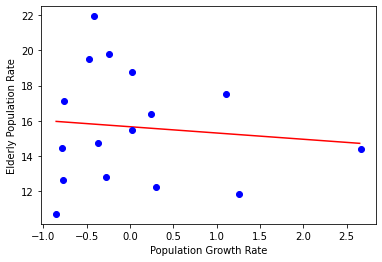

In [14]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')

### polynomial regression
- 2nd power; a, b, and c

In [15]:
# initialize a, b, and c by random

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

In [16]:
# define the fuction for returning the meand of the square of the residual error

def compute_loss1():
  y_pred = a*X*X + b*X + c
  loss = tf.reduce_mean((Y-y_pred)**2)
  return loss

In [17]:
optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):

  # minimize the mean of the square of the residual error
  optimizer.minimize(compute_loss1, var_list=[a, b, c])
  
  if i%100 == 99:
    print(i, 'a: {} b: {} c: {} loss: {}'.format(a.numpy(), b.numpy(), c.numpy(), compute_loss1().numpy()))

99 a: 4.108550071716309 b: -6.095279693603516 c: 6.627121925354004 loss: 66.62771606445312
199 a: 2.734295129776001 b: -4.370497703552246 c: 10.388351440429688 loss: 30.78302764892578
299 a: 1.2086936235427856 b: -2.12825083732605 c: 13.02059555053711 loss: 15.648122787475586
399 a: 0.2723034620285034 b: -0.7527074813842773 c: 14.644331932067871 loss: 10.838088989257812
499 a: -0.21816544234752655 b: -0.03245892375707626 c: 15.496553421020508 loss: 9.693038940429688
599 a: -0.43904104828834534 b: 0.2918751835823059 c: 15.880484580993652 loss: 9.4872465133667
699 a: -0.5248664617538452 b: 0.41790008544921875 c: 16.029674530029297 loss: 9.459233283996582
799 a: -0.5536774396896362 b: 0.4602048397064209 c: 16.079761505126953 loss: 9.45634651184082
899 a: -0.5620250701904297 b: 0.4724634289741516 c: 16.094270706176758 loss: 9.456123352050781
999 a: -0.5641010403633118 b: 0.4755115509033203 c: 16.09787940979004 loss: 9.4561128616333


Text(0, 0.5, 'Elderly Population Rate(%)')

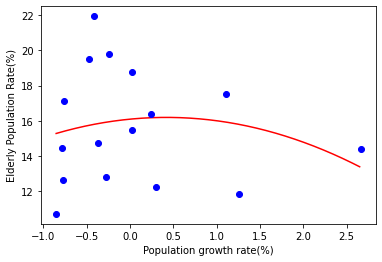

In [18]:
# draw the graph

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b*line_x + c

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population growth rate(%)')
plt.ylabel('Elderly Population Rate(%)')

### Polynomial Regression
- 3rd power; a, b, c, and d

In [19]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

In [20]:
def compute_loss2():
  y_pred = a*X*X*X + b*X*X + c*X + d
  loss = tf.reduce_mean((Y-y_pred)**2)
  return loss

In [21]:
optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
  optimizer.minimize(compute_loss2, var_list=[a, b, c, d])

  if i%100 == 99:
    print(i, 'a: {} b: {} c: {} loss: {}'.format(a.numpy(), b.numpy(), c.numpy(), compute_loss1().numpy()))

99 a: -1.2759530544281006 b: 6.212776184082031 c: -3.9870755672454834 loss: 445.1162414550781
199 a: -2.087669849395752 b: 7.125644683837891 c: -2.286184310913086 loss: 402.24310302734375
299 a: -1.7560607194900513 b: 5.381063461303711 c: -0.9545142650604248 loss: 336.6814270019531
399 a: -0.9986909031867981 b: 3.0052852630615234 c: -0.5848097801208496 loss: 299.2493591308594
499 a: -0.27322185039520264 b: 0.8797671794891357 c: -0.4845025837421417 loss: 276.62603759765625
599 a: 0.2960866093635559 b: -0.7679106593132019 c: -0.43964022397994995 loss: 262.4705810546875
699 a: 0.7046186327934265 b: -1.947729468345642 c: -0.411581814289093 loss: 253.74734497070312
799 a: 0.9790812730789185 b: -2.740002155303955 c: -0.3932951092720032 loss: 248.5130615234375
899 a: 1.1525362730026245 b: -3.2406346797943115 c: -0.3818436861038208 loss: 245.4604034423828
999 a: 1.2557594776153564 b: -3.5385549068450928 c: -0.37504109740257263 loss: 243.73681640625


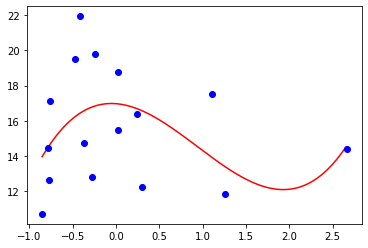

In [22]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x*line_x*line_x + b*line_x*line_x + c*line_x + d

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')

### keras.sequential

In [23]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
                             tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 254.8648
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 108.5711
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 9.8922
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6883
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 9.6637
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6590
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6557
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6523
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6488
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 9.6452


In [25]:
model.predict(X)

array([[15.880758],
       [15.684193],
       [15.621919],
       [15.864438],
       [15.701081],
       [15.879871],
       [15.820843],
       [15.768272],
       [15.687047],
       [15.792504],
       [15.664044],
       [15.783037],
       [15.814663],
       [15.863261],
       [15.689895],
       [13.940868]], dtype=float32)

Text(0, 0.5, 'Elderly Population Rate(%)')

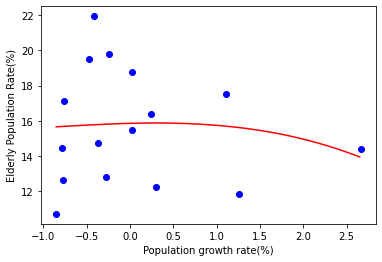

In [26]:
#draw the graph

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population growth rate(%)')
plt.ylabel('Elderly Population Rate(%)')